In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("data/train.csv")

# Select some useful continuous features
features = ["LotArea", "OverallQual", "YearBuilt"]
X = train_data[features].values
Y = train_data["SalePrice"].values.reshape(-1, 1)

# train_data = np.genfromtxt("data/train.csv", delimiter=",")
# X = train_data[1:, (4, 17, 19)]
# Y = train_data[1:, -1].reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)
Y = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])
N, d = X.shape
print(f"Dataset size: {N} samples, {d} features (including bias)")

Dataset size: 1460 samples, 4 features (including bias)


In [3]:
def l(Theta, X, Y):
    return np.mean(np.square(X @ Theta - Y))

def grad_l(Theta, X, Y):
    return 2 * X.T @ (X @ Theta - Y) / X.shape[0]

def accuracy(Theta, X, Y):
    preds = sigmoid(X @ Theta) >= 0.5
    return (preds == Y).mean()

def SGD(l, grad_l, X, Y, Theta0, lr=1e-2, batch_size=32, epochs=10):
    """
    Simplified Stochastic Gradient Descent (SGD) implementation.
    l: loss function, grad_l: gradient wrt Theta
    X, Y: dataset
    Theta0: initial parameters
    lr: learning rate (eta)
    """
    # Save the value of the loss over the iterations
    loss_val = []

    # Save the value of the accuracy over the iterations
    acc_val = []

    Theta = Theta0
    for epoch in range(epochs):
        # Something
        # Step 4: Restart the data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches = len(X) // batch_size
        for batch in range(n_batches):
            # Step 1: Randomly sample a batch from data
            Xb = X[batch * batch_size : (batch+1) * batch_size]
            Yb = Y[batch * batch_size : (batch+1) * batch_size]

            # Step 2: Compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)

            # Step 3: Perform one step of GD on g
            Theta = Theta - lr * g

            # Update the loss_val list
            loss_val.append(l(Theta, X, Y))
            acc_val.append(accuracy(Theta, X, Y))
    return Theta, epoch, loss_val, acc_val

# Theta0 = np.zeros((X.shape[1], 1))
# Theta, epochs, loss_val = SGD(l, grad_l, X, Y, Theta0, lr=1e-3, batch_size=32, epochs=100)

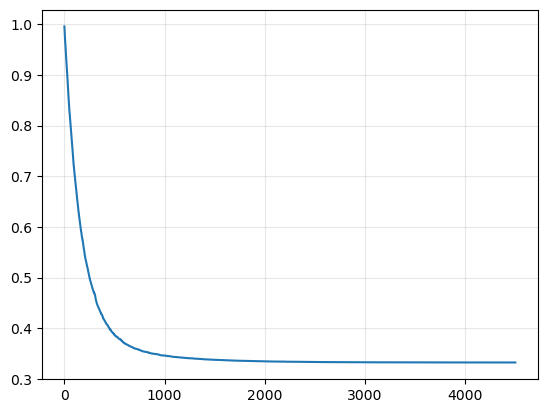

In [28]:
# Visualize the loss
import matplotlib.pyplot as plt

plt.plot(loss_val)
plt.grid(alpha=0.3)
plt.show()

In [4]:
def adam(l, 
        grad_l,
        Theta0, 
        X, Y, 
        beta1=0.9, beta2=0.999, eps=1e-8,
        batch_size=64, 
        lr=1e-3, 
        epochs=500):
    N, d = X.shape
    Theta = Theta0.copy()

    m = np.zeros_like(Theta)
    v = np.zeros_like(Theta)
    t = 0
    losses = []

    for epoch in range(epochs):
        idx = np.random.permutation(N)

        for start in range(0, N, batch_size):
            batch_idx = idx[start:start+batch_size]
            Xb, Yb = X[batch_idx], Y[batch_idx]
            g = grad_l(Theta, Xb, Yb)

            # Adam updates
            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g * g)
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            Theta -= lr * (m_hat / (np.sqrt(v_hat) + eps))

            losses.append(l(Theta, X, Y))

    return Theta, losses

Theta_adam, loss_adam = adam(l, grad_l, Theta0, X, Y, batch_size=32, epochs=100, lr=1e-3)

NameError: name 'Theta0' is not defined

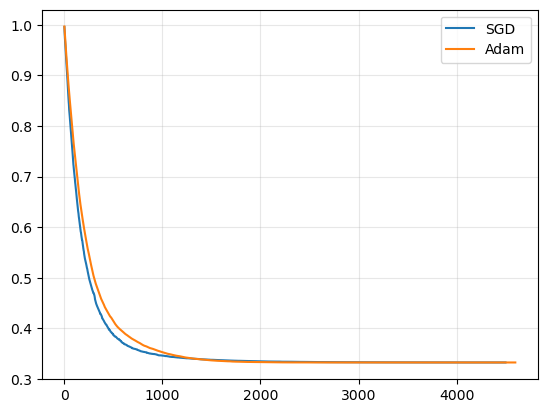

In [36]:
plt.plot(loss_val)
plt.plot(loss_adam)
plt.grid(alpha=0.3)
plt.legend(["SGD", "Adam"])
plt.show()

In [9]:
import numpy as np
import pandas as pd

# Download `diabetes.csv` from Kaggle and place it in notebook directory
df = pd.read_csv("data/diabetes.csv")

# df = np.genfromtxt("data/diabetes.csv", delimiter=",")
# X = df[1:, :-1]
# Y = df[1:, -1].reshape(-1, 1)

X = df.drop("Outcome", axis=1).values   # features
Y = df["Outcome"].values.reshape(-1,1)  # labels

# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.hstack([np.ones((X.shape[0],1)), X])
N, d = X.shape

In [10]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def l(Theta, X, Y):
    # When you see Theta^T x <-> in matrix form you have
    #                            X @ Theta
    Y_hat = sigmoid(X @ Theta)
    return - np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1 - Y_hat))

def grad_l(Theta, X, Y):
    Y_hat = sigmoid(X @ Theta)
    return X.T @ (Y_hat - Y)

# Train the model
Theta0 = np.zeros((X.shape[1], 1))
Theta_sgd, _, loss_sgd, acc_sgd = SGD(l, grad_l, X, Y, Theta0, lr=1e-3, batch_size=32, epochs=100)
Theta_adam, loss_adam = adam(l, grad_l, Theta0, X, Y, lr=1e-3, batch_size=32, epochs=100)

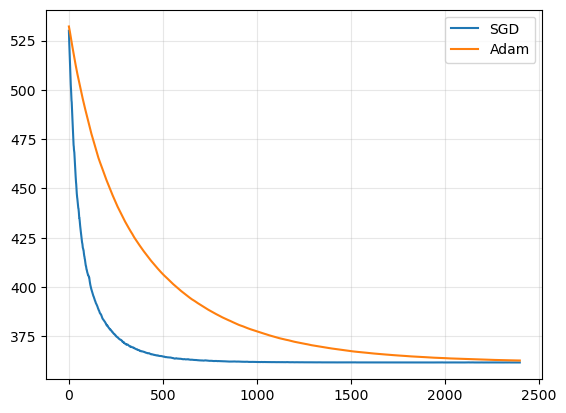

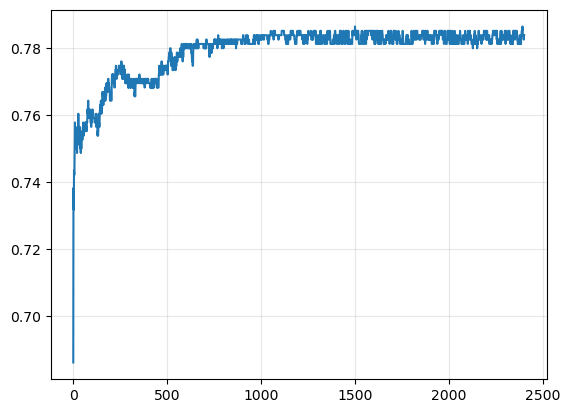

In [11]:
import matplotlib.pyplot as plt

plt.plot(loss_sgd)
plt.plot(loss_adam)
plt.legend(["SGD", "Adam"])
plt.grid(alpha=0.3)
plt.show()

plt.plot(acc_sgd)
plt.grid(alpha=0.3)
plt.show()